###Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

###Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Importing the Dependencies

In [ ]:
import numpy as np

linear regression model

In [ ]:
class Linear_Regression():

   def __init__( self, learning_rate, no_of_iterations ) :

        self.learning_rate = learning_rate

        self.no_of_iterations = no_of_iterations

    # fit function to train the model

   def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features

        self.m, self.n = X.shape

        # initiating the weight and bias

        self.w = np.zeros( self.n )

        self.b = 0

        self.X = X

        self.Y = Y


        # implementing Gradient Descent for Optimization

        for i in range( self.no_of_iterations ) :

            self.update_weights()



    # function to update weights in gradient descent

   def update_weights( self ) :

        Y_prediction = self.predict( self.X )

        # calculate gradients

        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m

        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m

        # updating the weights

        self.w = self.w - self.learning_rate * dw

        self.b = self.b - self.learning_rate * db


    # Line function for prediction:

   def predict( self, X ) :

        return X.dot( self.w ) + self.b


using linear regression for predection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data pre processing

In [ ]:
salary_data = pd.read_csv('salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

splitting feature and target value

In [ ]:
X = salary_data.iloc[:, :-1].values  #yrs of exp
Y = salary_data.iloc[:, 1].values  #salary values

splitting test n train data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2)

training linear regression model

In [ ]:
model  = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
print(model.w[0])
print(model.b)

9514.400999035135
23697.406507136307


y = 9514(x) + 23697

salary = 9514(exp) + 23697

In [16]:
test_data_pred = model.predict(X_test)

In [17]:
print(test_data_pred)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


visualizing the predicted values and actual values

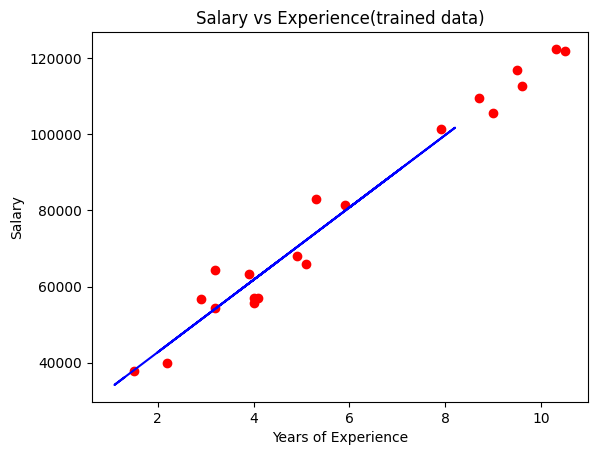

In [28]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_test, test_data_pred , color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience(trained data)')
plt.show()

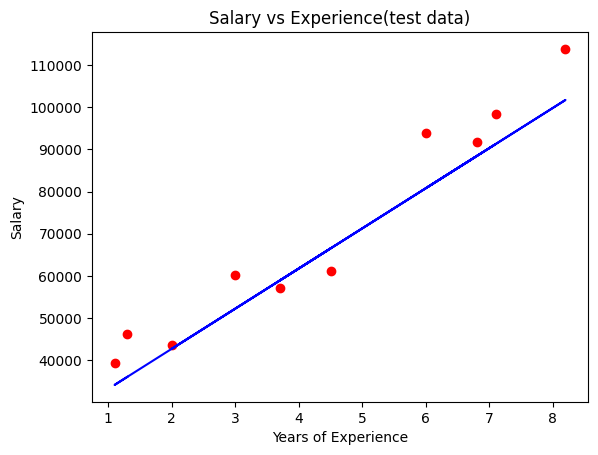

In [29]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_pred , color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience(test data)')
plt.show()